<a href="https://colab.research.google.com/github/jeong-jinuk/kisti_study/blob/master/%E1%84%90%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%84%82%E1%85%B5%E1%86%A8_191216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#titanic

컬럼 설명

    Survival - 생존 여부. 0이면 사망, 1이면 생존한 것으로 간주합니다.
    Pclass - 티켓 등급. 1등석(1), 2등석(2), 3등석(3)이 있으며, 1등석일수록 좋고 3등석일수록 좋지 않습니다.
    Sex - 성별. 남자(male)와 여자(female)이 있습니다.
    Age - 나이입니다. 틈틈히 빈 값이 존재하며, 소수점 값도 존재합니다.
    SibSp - 해당 승객과 같이 탑승한 형재/자매(siblings)와 배우자(spouses)의 총 인원 수입니다.
    Parch - 해당 승객과 같이 탑승한 부모(parents)와 자식(children)의 총 인원 수입니다.
    Ticket - 티켓 번호입니다. 다양한 텍스트(문자열)로 구성되어 있습니다.
    Fare - 운임 요금입니다. 소수점으로 구성되어 있습니다.
    Cabin - 객실 번호입니다. 많은 빈 값이 존재하며, 다양한 텍스트(문자열)로 구성되어 있습니다.
    Embarked - 선착장입니다. C는 셰르부르(Cherbourg)라는 프랑스 지역, Q는 퀸스타운(Queenstown)이라는 영국 지역, S는 사우스햄튼(Southampton)이라는 영국 지역입니다.

In [1]:
# colab - google drive mount
from google.colab import drive
drive.mount('gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


In [2]:
%cd "/content/gdrive/My Drive/kisti_colab/kisti-kaggle-competition-2"
!ls -al

/content/gdrive/My Drive/kisti_colab/kisti-kaggle-competition-2
total 1332
drwx------ 2 root root    4096 Dec 11 06:33 datasets
-rw------- 1 root root    2839 Dec 16 01:23 decision_tree.csv
-rw------- 1 root root   18871 Dec 16 04:14 타이타닉.ipynb
-rw------- 1 root root 1334675 Dec 13 07:21 titanic_kisti_20191211.ipynb
-rw------- 1 root root    2839 Dec 13 07:21 titanic_submission.csv


타이타닉 이슈는 선박사고시 생존률을 파악하기 위한 이슈이다.
그러므로 분석을 행함에 있어 중요한 요인과 중요하지 않은 요인을 구분하는것이 첫번째 스텝이 될 수 있다.
우선 실제 데이터로써 판단의 기준이 되는 train 데이터를 불러오고 데이터의 정확도를 확인하기 위한 test 데이터를 불러온다.

In [0]:
import pandas as pd # 데이터 분석을 위한 파이썬 라이브러리
import numpy as np #아래 시각화 라이브러리를 사용하기 위한 수학라이브러리인 넘파이 라이브러리호출
import seaborn as sns
import matplotlib.pyplot as plt # 시각화 라이브러리인 시본과 매트랩을 불러옴
%matplotlib inline

In [0]:
#데이터를 읽어온다
trainD = pd.read_csv("./datasets/train.csv")
testD = pd.read_csv("./datasets/test.csv")

In [5]:
trainD.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
testD.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


트레인 데이터와 테스트데이터의 컬럼을 확인!
생존률을 확인하고 싶은것이므로 test데이터에는 Survived 컬럼이 추가되어야 하며 분석의 결과값은 항상 Survived이다.
그럼 제일먼저 남성의 운동능력이 뛰어난 경우가 많으므로 남성의 생존률이 높다는가정하에 성별에따른 데이터를 확인해보려 한다.

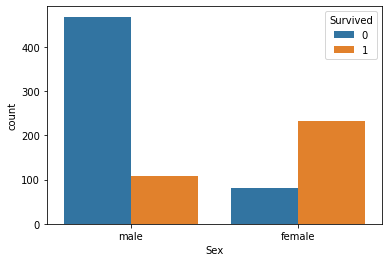

In [7]:
sns.countplot(data=trainD,x='Sex',hue='Survived')

In [8]:
pd.pivot_table(trainD,index="Sex",values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


그러나 기대와는 달리 여성의 생존률은 75퍼에 육박하지만 남성의 경우 18퍼정도밖에 안되는것을 볼 수 있다.
그 원인으로는 구조시의 우선순위나 혹은 가족들을 지키려는 가장의 희생이라 추측해보려 한다.
따라서 선박사고시에 대부분의 남자는 죽고 대부분의 여자는 살아남는다고 가정을 할 수 있다.
하지만 단순히 남자만 죽고 여자만 산다고 결론지을수 없으므로 다른 요인이 없는지 살펴보도록 하자.
위 데이터에서 확인할수 있는 내용으로는 객실 등급과 가족의 여부, 직업, 티켓가격, 출발지, 객실번호,나이등을 활용할 수 있어 보인다.

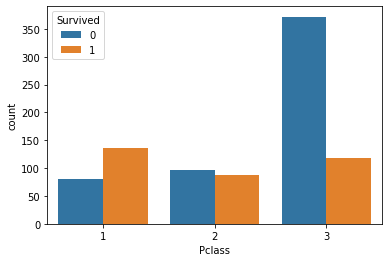

In [9]:
sns.countplot(data=trainD,x="Pclass",hue="Survived")

위와같이 객실 등급에 따른 생존율을 살펴보면, 등급이 높은 등급일수록 생존확률이 올라간다고 분석이 가능하다.
이를 수치화 해보면

In [10]:
pd.pivot_table(trainD,index="Pclass",values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


1등석은 60퍼센트가 넘는 생존률을 보이지만 3등석은 25퍼센트도 채 안되는 생존률을 보이는데 이는 1등석이 출구에 더 가깝거나,
배의 상단부에 위치하여 그렇다는 추측을 가능하게 한다.
이는 티켓 가격과 객실 번호와 연관지을 수있지만 객실번호의 경우

In [11]:
trainD.groupby(trainD["Cabin"].isnull()).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Cabin,,,,,,,,,,,,
False,204,204,204,204,204,185,204,204,204,204,204,202
True,687,687,687,687,687,529,687,687,687,687,0,687


와 같이 결측치가 너무 많이나오므로, 사용하기가 어렵다.
이에따라 티켓가격을 생각해보면

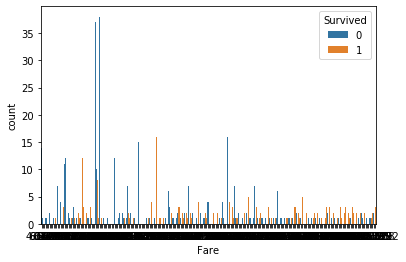

In [12]:
sns.countplot(data=trainD,x="Fare",hue="Survived")

위 그래프처럼 알아보기가 쉽지 않다.
그러므로 Fare의 가격대를 조금 단순화 해보도록 하자
즉, 범위로 나누어서 정리하는게 보기 편할것이다.

In [13]:
Fare_Re = trainD[['Fare','Survived']]
Fare_Re.head()

,Fare,Survived
0,7.2500,0
1,71.2833,1
2,7.9250,1
3,53.1000,1
4,8.0500,0


{'boxes': [<matplotlib.lines.Line2D at 0x7fafe5477be0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fafe55806a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fafe543b080>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fafe5580d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fafe5477f60>,
  <matplotlib.lines.Line2D at 0x7fafe5580358>]}

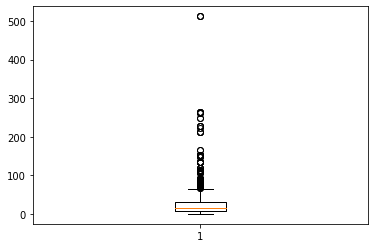

In [14]:
plt.boxplot(Fare_Re['Fare'])

In [15]:
Fare_Re['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

박스그래프와 요약정보를 토대로 살펴보면 outlier 가 상당히 존재한다는 것을 알 수 있다.
따라서 아래의 데이터 전처리에서 4분위수로 나누어 Fare를 재정의 하려고 한다.
다음으로는 출발지에 대해 분석을 해보면

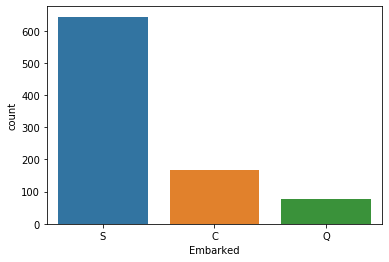

In [16]:
sns.countplot(data=trainD,x='Embarked')

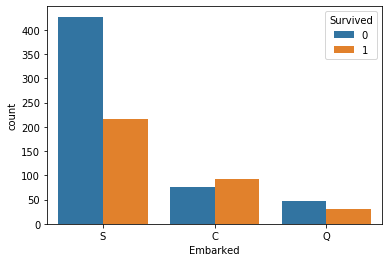

In [17]:
sns.countplot(data=trainD,x="Embarked",hue="Survived")

S라는 출발지, 즉, 사우스햄튼에서 탑승한 인원이 제일 많았으며 세르부르에서 탑승한 인원이 생존 비율이 높았다는 것을 알 수 있다.
마지막으로 동승한 가족 여부에 따른 생존률을 분석해보자면

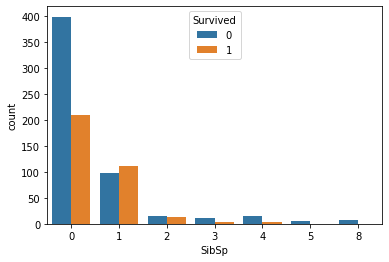

In [18]:
sns.countplot(data=trainD,x="SibSp",hue="Survived")

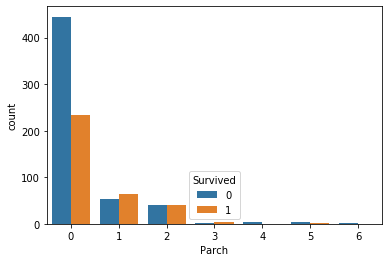

In [19]:
sns.countplot(data=trainD,x="Parch",hue="Survived")

가 되므로 사우스햄튼과 퀸드타운에서 탄 인원은 대부분 죽었고, 세르부르에서 탑승한 인원은 절반이상 살아남은 모습을 알 수 있다.

위의 분석들을 토대로 정리해보면 선박 사고시 1등석에 앉으며 높은 가격을 지불하고, 여성이면서 동승한 가족이 있지만 수가 너무 많지 않을때 
생존할 확률이 높다는것을 알 수 있다.

사용하기 위해 데이터 전처리를 해보자

In [0]:
train = trainD
test = testD

In [0]:
train.loc[train["Sex"]=="male","Sex_encode"]=int(0)
train.loc[train["Sex"]=="female","Sex_encode"]=int(1)

test.loc[test["Sex"]=="male","Sex_encode"]=int(0)
test.loc[test["Sex"]=="female","Sex_encode"]=int(1)
#train, test 데이터의 성별을 컴퓨터가 구분할 수 있는 0과 1로 처리해줌

In [22]:
#운임요금 결측치 확인
train[train["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode


In [23]:
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


결측치를 제거하면서 원본 데이터를 손상시키지 않도록 새로운 컬럼을 추가함

In [0]:
train["Fare_fill"] = train["Fare"]
test["Fare_fill"] = test["Fare"]

In [71]:
train['Fare_fill'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare_fill, dtype: float64

In [72]:
#test데이터에만 결측치가 존재하므로, 결측치를 Fare의 평균으로 치환
test['Fare_fill']=test["Fare_fill"].fillna(test['Fare'].mean())
test.loc[test["Fare"].isnull(),["Fare","Fare_fill"]]

,Fare,Fare_fill
152,NaN,35.627188


In [0]:
'''
test[test['Fare_fill']<=7.910400]['Fare_fill'] = 7.910400
test[(test['Fare_fill']>7.910400) & (test['Fare_fill']<=14.454200)]['Fare_fill'] =  14.454200
test[test['Fare_fill']> 14.454200]['Fare_fill']= 31.000000

train[train['Fare_fill']<=7.910400]['Fare_fill'] = 7.910400
train[(train['Fare_fill']>7.910400) & (train['Fare_fill']<=14.454200)]['Fare_fill'] =  14.454200
train[train['Fare_fill']> 14.454200]['Fare_fill']= 31.000000
'''
test.loc[test['Fare_fill']<=7.9104,'Fare_fill'] = 7.9104
test.loc[(test['Fare_fill']>7.9104)&(test['Fare_fill']<=14.4542),'Fare_fill']=14.4542
test.loc[test['Fare_fill']>14.4542,'Fare_fill'] = 31.0000

train.loc[train['Fare_fill']<=7.9104,'Fare_fill'] = 7.9104
train.loc[(train['Fare_fill']>7.9104)&(train['Fare_fill']<=14.4542),'Fare_fill']=14.4542
train.loc[train['Fare_fill']>14.4542,'Fare_fill'] = 31.0000

In [74]:
test['Fare_fill'].head()

0     7.9104
1     7.9104
2    14.4542
3    14.4542
4    14.4542
Name: Fare_fill, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7fafdec51eb8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fafdec5f898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fafdec692b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fafdec5ff28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fafdec5f208>,
  <matplotlib.lines.Line2D at 0x7fafdec5f550>]}

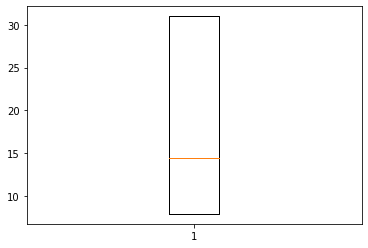

In [75]:
plt.boxplot(test['Fare_fill'])

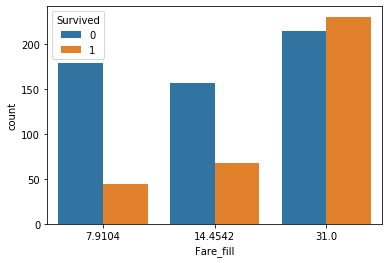

In [76]:
sns.countplot(data=train,x="Fare_fill",hue="Survived")

In [77]:
#출발지 전처리
'''
train["Embarked_C"][train["Embarked"] == "C"] = 0
train[train["Embarked"] == "S"]["Embarked_S"] = 1
train[train["Embarked"] == "Q"]["Embarked_Q"] = 2

test[test["Embarked"] == "C"]["Embarked_C"] = 0
test[test["Embarked"] == "S"]["Embarked_S"] = 1
test[test["Embarked"] == "Q"]["Embarked_Q"] = 2
'''
train.loc[train['Embarked']=="C",'Embarked'] = 1
train.loc[train['Embarked']=="S",'Embarked'] = 2
train.loc[train['Embarked']=="Q",'Embarked'] = 3

test.loc[test['Embarked']=="C",'Embarked'] = 1
test.loc[test['Embarked']=="S",'Embarked'] = 2
test.loc[test['Embarked']=="Q",'Embarked'] = 3
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Fare_fill,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,0.0,7.9104,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,1.0,31.0000,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1.0,14.4542,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,1.0,31.0000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,0.0,14.4542,0


In [78]:
#가족 수 전처리
train["Family"] = train["SibSp"]+train["Parch"]
test["Family"] = test["SibSp"]+test["Parch"]
train["Family"].head()

0    1
1    1
2    0
3    1
4    0
Name: Family, dtype: int64

In [0]:
#이제 학습하기 위한 조건으로 쓸 변수들을 리스트로 만들자
feature_names = ["Pclass","Sex_encode","Fare_fill","Embarked","Family"]
#다음으로는 알고싶은 결과값을 라벨로 만들어두자
label_name = "Survived"

In [0]:
X_train = train[feature_names] # 학습용
X_test = test[feature_names] # 검증용
Y_train=train[label_name] # 

In [0]:
#디시전 트리를 사용하여 머신러닝 시행
from sklearn.tree import DecisionTreeClassifier

In [81]:
X_train

,Pclass,Sex_encode,Fare_fill,Embarked,Family
0,3,0.0,7.9104,2,1
1,1,1.0,31.0000,1,1
2,3,1.0,14.4542,2,0
3,1,1.0,31.0000,2,1
4,3,0.0,14.4542,2,0
...,...,...,...,...,...
886,2,0.0,14.4542,2,0
887,1,1.0,31.0000,2,0
888,3,1.0,31.0000,2,3
889,1,0.0,31.0000,1,0


In [82]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [84]:
X_train.loc[X_train['Embarked'].isnull(),'Embarked'] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [85]:
X_train[X_train['Embarked'].isnull()]

,Pclass,Sex_encode,Fare_fill,Embarked,Family


In [86]:
model = DecisionTreeClassifier(max_depth=4,random_state=10)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [87]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

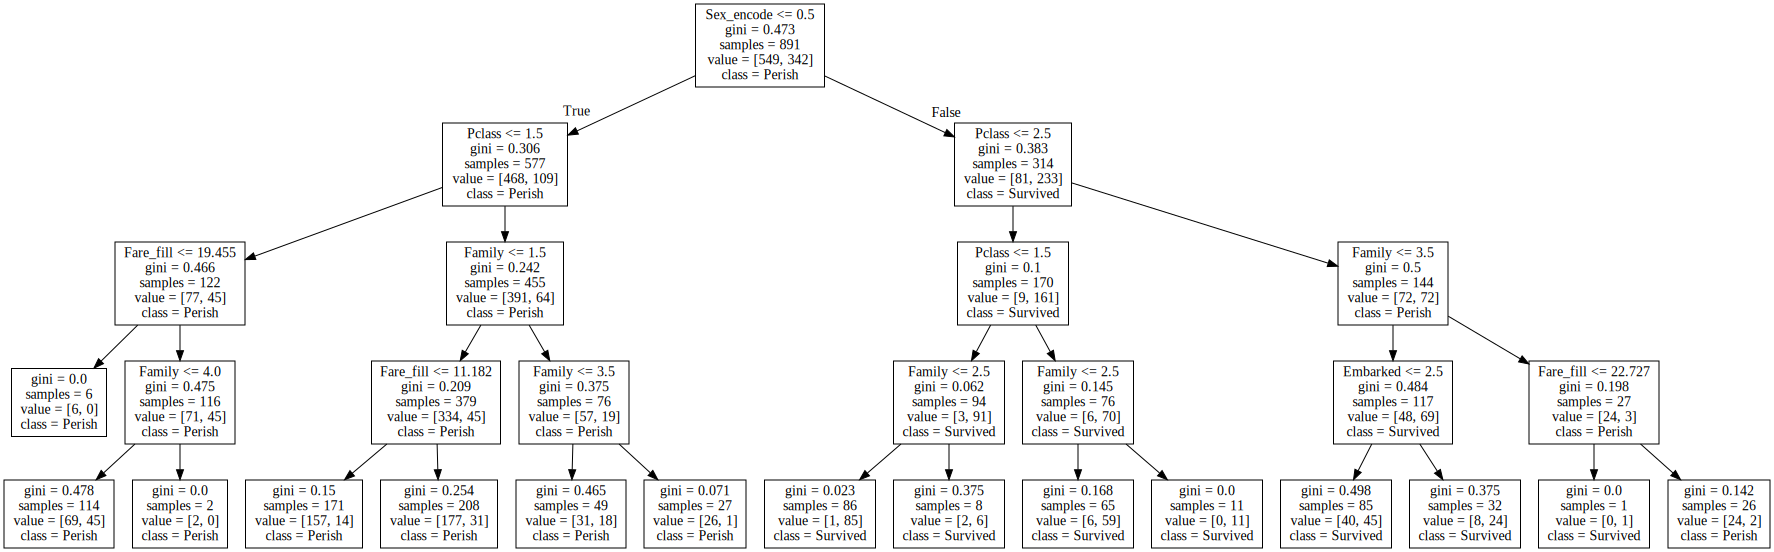

In [88]:
import graphviz
from sklearn.tree import export_graphviz
dot_tree = export_graphviz(model, feature_names=feature_names,class_names=["Perish","Survived"],out_file=None)
graphviz.Source(dot_tree)

In [89]:
predictions = model.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
submission = pd.read_csv("./datasets/sample_submission.csv")

In [0]:
submission["Survived"] = predictions

In [0]:
submission = submission[['PassengerId','Survived']]

In [93]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [94]:
type(submission)

pandas.core.frame.DataFrame

In [0]:
submission.to_csv("decision_tree.csv",index=False)

여러가지 시각화 방법을 사용하는 것이 더 좋음.
분석방법이 여러가지가 있지만 하나만 쓰면 내가 아는것을 보일수가 없다,!
판다스나 시본등에서 다른 형태의 시각화도 고려해보는것이 좋음...